In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import PySulfSat as ss

In [2]:
sys.path.append(r'G:\My Drive\Berkeley_NEW\MELTS_python_Paula\melts_matlab_git_master\package')

In [3]:
#!pip install --upgrade "https://github.com/gleesonm1/pyMELTScalc/archive/refs/tags/v0.0.7.zip"

## Import PySulfSat

In [4]:
#!pip install --upgrade "https://github.com/PennyWieser/PySulfSat/archive/refs/tags/v.0.0.1.zip"

In [5]:
import PySulfSat as ss
ss.__version__

'0.0.3'

In [6]:
import pyMELTScalc as M
M.__version__

'0.0.7'

In [7]:
df_out2=ss.import_data('Glass_input_example.xlsx', sheet_name='Glass_input', 
                       suffix="_Liq", sample_label='Sample_ID_Liq')
df_out2.head()
# Selecting a single composition to start the model from
sample=df_out2.iloc[0]

We have replaced all missing liquid oxides and strings with zeros. 


In [8]:
P=1000
MELTS_FC=M.multi_iso_crystallise(Model = "MELTSv1.0.2", 
                        Fe3Fet_Liq=0.1,
                        comp = sample.to_dict(), 
                        Frac_solid = True, 
                        Frac_fluid = True, 
                        T_start_C = 1200, 
                        T_end_C = 750, 
                        dt_C = 5, 
                        P_path_bar = P, 
                        find_liquidus = True)

In [9]:
MELTS=MELTS_FC['All']

In [10]:
# Lets see what phases we have!
MELTS.columns[MELTS.columns.str.contains('SiO2')]

Index(['SiO2_Liq', 'SiO2_Cpx', 'SiO2_Plag', 'SiO2_Cpx2', 'SiO2_rutile1',
       'SiO2_Sp', 'SiO2_Ol', 'SiO2_whitlockite1'],
      dtype='object')

In [11]:
MELTS.head()

,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,Fe2O3_Liq,...,Na2O_whitlockite1,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1_prop,mass_whitlockite1_prop,v_whitlockite1_prop,rho_whitlockite1_prop
0,1183.300000,1000.0,-1.180231e+06,263.406565,36.469894,50.436352,2.040399,13.134570,0.0,1.470281,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1178.319540,1000.0,-1.182782e+06,261.652227,36.269339,50.400619,2.132021,13.079651,0.0,1.504555,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1173.339080,1000.0,-1.120803e+06,248.027312,34.408849,50.347120,2.248859,12.894563,0.0,1.554907,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1168.358621,1000.0,-1.050379e+06,233.074597,32.336062,50.279685,2.371121,12.701134,0.0,1.609440,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1163.378161,1000.0,-9.853206e+05,219.223435,30.414423,50.194928,2.502151,12.492723,0.0,1.669881,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [12]:
Smythe_CalcSulf=ss.calculate_Smythe2017_SCSS(df=MELTS, 
                                             T_K=MELTS['T_C']+273.15, 
P_kbar=P/1000, Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=MELTS['Fe3Fet_Liq'])

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,...,Na2O_whitlockite1,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1_prop,mass_whitlockite1_prop,v_whitlockite1_prop,rho_whitlockite1_prop
0,1454.518500,397.330492,1456.450000,1.0,0.65,0.099881,0.476324,0.014491,0.146194,0.092649,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1494.547536,408.265214,1451.469540,1.0,0.65,0.099172,0.476741,0.015166,0.145814,0.090053,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1566.526918,427.927806,1446.489080,1.0,0.65,0.098664,0.477210,0.016030,0.144044,0.087788,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1649.579823,450.615349,1441.508621,1.0,0.65,0.098424,0.477593,0.016937,0.142188,0.085414,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1746.921925,477.206270,1436.528161,1.0,0.65,0.098498,0.477881,0.017914,0.140175,0.082840,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


Text(0, 0.5, 'SCSS (Smythe, ppm)')

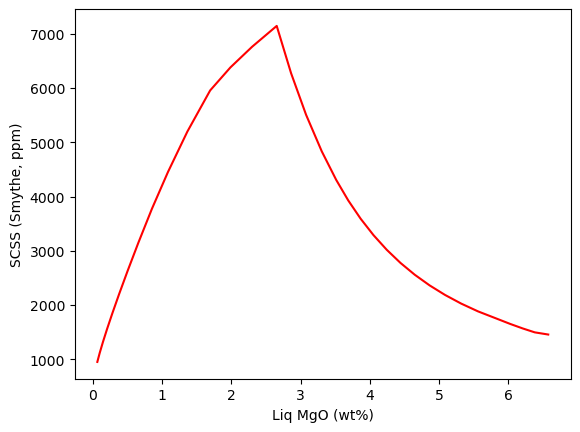

In [13]:
plt.plot(MELTS['MgO_Liq'], Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('SCSS (Smythe, ppm)')

Text(0, 0.5, 'Liq FeO (wt%)')

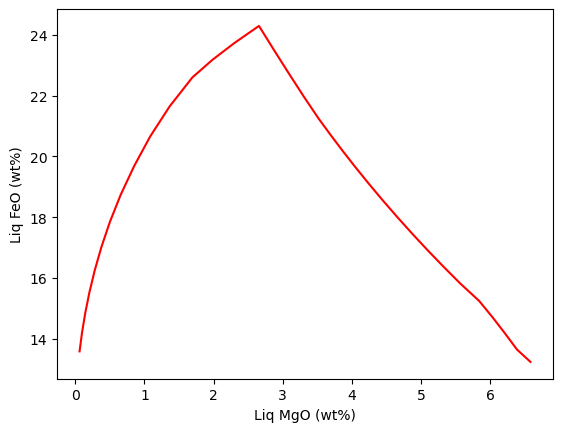

In [14]:
plt.plot( MELTS['MgO_Liq'],MELTS['FeOt_Liq'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('Liq FeO (wt%)')

## Using Oneill

In [15]:
#Fe_FeNiCu_Sulf=0.66
Fe_FeNiCu_Sulf=MELTS['Fe3Fet_Liq']
if isinstance(Fe_FeNiCu_Sulf, float) is True:
    print('float')

In [16]:
ONeill_MeasSulf=ss.calculate_ONeill2021_SCSS(df=MELTS, T_K=MELTS['T_C']+273.15, 
P_kbar=P/1000,
Fe_FeNiCu_Sulf=0.66,
Fe3Fet_Liq=MELTS['Fe3Fet_Liq'])
ONeill_MeasSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,T_C,P_bar,h,s,...,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,Fe2_Liq_cat_frac
0,1377.576664,7.228081,-2.088862,-0.514565,7.783390,-2.129605,1183.300000,1000.0,-1.180231e+06,263.406565,...,0.002003,0.104767,0.114208,0.146413,0.045315,0.002958,0.014516,0.469671,0.495940,0.094302
1,1393.058267,7.239257,-2.061261,-0.518023,7.818963,-2.122944,1178.319540,1000.0,-1.182782e+06,261.652227,...,0.002111,0.108155,0.111297,0.146043,0.046408,0.003108,0.015193,0.454716,0.480712,0.097429
2,1429.158636,7.264841,-2.029301,-0.522524,7.854794,-2.096729,1173.339080,1000.0,-1.120803e+06,248.027312,...,0.002247,0.112591,0.108159,0.144286,0.047420,0.003294,0.016060,0.438511,0.464228,0.101482
3,1468.587834,7.292057,-1.998767,-0.527077,7.890884,-2.070518,1168.358621,1000.0,-1.050379e+06,233.074597,...,0.002389,0.117088,0.105246,0.142442,0.048368,0.003487,0.016972,0.422219,0.447677,0.105564
4,1512.800869,7.321718,-1.969354,-0.531711,7.927237,-2.043162,1163.378161,1000.0,-9.853206e+05,219.223435,...,0.002541,0.121685,0.102648,0.140441,0.049258,0.003692,0.017952,0.405484,0.430706,0.109699


## Once have a Ni and cu model - working on this

In [ ]:
# ONeill_CalcSulf=ss.calculate_ONeill2021_SCSS(df=Liqs, T_K=Liqs['temp_HT87'], P_kbar=0.6, 
#     Fe_FeNiCu_Sulf="Calc_ONeill",
#     Ni_Liq=Liqs['Ni_modelled'], Cu_Liq=Liqs['Cu_modelled'], Fe3Fet_Liq=Liqs['Fe3Fet_Liq'])


# ONeill_CalcSmythe_Sulf=ss.calculate_ONeill2021_SCSS(df=Liqs, T_K=Liqs['temp_HT87'], P_kbar=0.6, 
#                            Fe_FeNiCu_Sulf="Calc_Smythe",
#                            Ni_Liq=Liqs['Ni_modelled'], Cu_Liq=Liqs['Cu_modelled'], Fe3Fet_Liq=Liqs['Fe3Fet_Liq'])